<h1>A short project on wheter someone will buy insurance or not with sklearn</h1> 

In [1]:
# lets import the necessary module

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# lets load the dataset into pandas 

df = pd.read_csv("./files/health_insurance.csv")
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [4]:
# the dataset shows the the prices and other features of a walmart store for 2 and half a year

In [5]:
df.shape

(50882, 14)

In [6]:
# lets see if there are any null values

In [7]:
df.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [8]:
# lets clean the datas
# lets see basic info of the columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [10]:
df.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [11]:
# first lets drop null values in the Holding policy type as it is very important

df1 = df.dropna(how='all', subset=['Holding_Policy_Type'])
df1.shape

(30631, 14)

In [12]:
df1.isnull().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           7083
Holding_Policy_Duration       0
Holding_Policy_Type           0
Reco_Policy_Cat               0
Reco_Policy_Premium           0
Response                      0
dtype: int64

In [13]:
# it seems that Holding_Policy_Type and Holding_Policy_Duration always have Null values at the same time

In [14]:
# lets only get a value out of Health Indicator as machine can only understand number

df2 = df1.copy()

df2['Health Indicator'] = df2['Health Indicator'].str[1:]

In [15]:
df2.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,1,14+,3.0,22,11628.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,2,3.0,1.0,16,10404.0,0
5,6,C9,1785,Rented,Individual,52,52,No,2,5.0,1.0,22,15264.0,1


In [19]:
# to fill up the na values in Health Indicator we can group by Region wise and grab the mean Health indicator of each
# group and fill them with the mean value of that particular group

In [69]:
# we need to convert Health Indicator to numearic value first
df3 = df2.copy()
df3['Health Indicator'] = df3['Health Indicator'].astype('float')

reg_grp = df3.groupby('Region_Code')
reg_grp

In [71]:
df2.head(3)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,1,14+,3.00000,22,11628.00000,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.00000,19,7450.00000,1
3,4,C24,4378,Owned,Joint,52,48,No,1,14+,3.00000,19,17780.00000,0


In [72]:
# to fill in na values according to mean
df3["Health Indicator"] = df3.groupby("Region_Code")['Health Indicator'].transform(lambda x: x.fillna(x.mean()))

In [73]:
df3.head(3)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,1.00000,14+,3.00000,22,11628.00000,0
2,3,C5,3732,Owned,Individual,32,32,No,1.00000,1.0,1.00000,19,7450.00000,1
3,4,C24,4378,Owned,Joint,52,48,No,1.00000,14+,3.00000,19,17780.00000,0


In [74]:
df3.isna().sum()

ID                           0
City_Code                    0
Region_Code                  0
Accomodation_Type            0
Reco_Insurance_Type          0
Upper_Age                    0
Lower_Age                    0
Is_Spouse                    0
Health Indicator           245
Holding_Policy_Duration      0
Holding_Policy_Type          0
Reco_Policy_Cat              0
Reco_Policy_Premium          0
Response                     0
dtype: int64

In [76]:
df3[df3.isna()].head(3)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,nan,NaN,nan,NaN,NaN,nan,nan,NaN,nan,NaN,nan,nan,nan,nan
2,nan,NaN,nan,NaN,NaN,nan,nan,NaN,nan,NaN,nan,nan,nan,nan
3,nan,NaN,nan,NaN,NaN,nan,nan,NaN,nan,NaN,nan,nan,nan,nan


In [77]:
# just dropping them would do

In [79]:
df4 = df3.dropna()
df4.isna().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

In [81]:
df4["Health Indicator"] = df4["Health Indicator"].apply(lambda x: int(x))

<ipython-input-81-48cfe7a795ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["Health Indicator"] = df4["Health Indicator"].apply(lambda x: int(x))


In [82]:
df4.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,1,14+,3.00000,22,11628.00000,0
2,3,C5,3732,Owned,Individual,32,32,No,1,1.0,1.00000,19,7450.00000,1
3,4,C24,4378,Owned,Joint,52,48,No,1,14+,3.00000,19,17780.00000,0
4,5,C8,2190,Rented,Individual,44,44,No,2,3.0,1.00000,16,10404.00000,0
5,6,C9,1785,Rented,Individual,52,52,No,2,5.0,1.00000,22,15264.00000,1


In [84]:
df4.to_csv("./files/cleaned_insurance_data.csv", index=False)

<h1>The data is now cleaned up we can just have to make the dataset suitable of machine learning</h1>

In [72]:
df5 = pd.read_csv("./files/cleaned_insurance_data.csv").drop('ID', axis=1)
df5.head(3)

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,C3,3213,Rented,Individual,36,36,No,1,14+,3.0,22,11628.0,0
1,C5,3732,Owned,Individual,32,32,No,1,1.0,1.0,19,7450.0,1
2,C24,4378,Owned,Joint,52,48,No,1,14+,3.0,19,17780.0,0


In [73]:
def dummy(value):
    if value == "No":
        return 0
    else:
        return 1

# to convert Is_Spouse column to binary representation
df5['Is_Spouse'] = df5['Is_Spouse'].apply(dummy)

In [74]:
# convertin Holding_Policy_Duration to int
def get_duration(x):
    try:
        duration = float(x)
    except:
        duration = float(x[-2::-1])
    
    return int(duration)

df5["Holding_Policy_Duration"] = df5["Holding_Policy_Duration"].apply(get_duration)

In [75]:
# now we need to convert city codes into int values
df5["City_Code"] = df5["City_Code"].str[1:]

In [76]:
df5["City_Code"] = df5["City_Code"].astype('int')

In [77]:
owned = pd.get_dummies(df5['Accomodation_Type']).drop("Rented", axis=1)
ins_type = pd.get_dummies(df5['Reco_Insurance_Type']).drop("Joint", axis=1)

owned.head(3)

,Owned
0,0
1,1
2,1


In [78]:
df6 = pd.concat([df5, owned, ins_type], axis=1).drop(['Accomodation_Type', 'Reco_Insurance_Type'], axis=1)
df6.head()

,City_Code,Region_Code,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Owned,Individual
0,3,3213,36,36,0,1,41,3.0,22,11628.0,0,0,1
1,5,3732,32,32,0,1,1,1.0,19,7450.0,1,1,1
2,24,4378,52,48,0,1,41,3.0,19,17780.0,0,1,0
3,8,2190,44,44,0,2,3,1.0,16,10404.0,0,0,1
4,9,1785,52,52,0,2,5,1.0,22,15264.0,1,0,1


In [79]:
# converting unnecessary float values to int
df6['Reco_Policy_Premium'] = df6['Reco_Policy_Premium'].astype('int')
df6['Holding_Policy_Type'] = df6['Holding_Policy_Type'].astype('int')

In [80]:
# converting value to int16 as they take less space
df6['Owned'] = df6['Owned'].astype('int16')
df6['Individual'] = df6['Individual'].astype('int16')

In [81]:
# to remove the out layers

mean = df6['Reco_Policy_Premium'].mean()
std = df6['Reco_Policy_Premium'].std()
z = 3
filt = (df6['Reco_Policy_Premium'] > (mean - z*std )) & (df6['Reco_Policy_Premium'] < (mean + z*std))
df6 = df6[filt]

In [82]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30196 entries, 0 to 30385
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   City_Code                30196 non-null  int32
 1   Region_Code              30196 non-null  int64
 2   Upper_Age                30196 non-null  int64
 3   Lower_Age                30196 non-null  int64
 4   Is_Spouse                30196 non-null  int64
 5   Health Indicator         30196 non-null  int64
 6   Holding_Policy_Duration  30196 non-null  int64
 7   Holding_Policy_Type      30196 non-null  int32
 8   Reco_Policy_Cat          30196 non-null  int64
 9   Reco_Policy_Premium      30196 non-null  int32
 10  Response                 30196 non-null  int64
 11  Owned                    30196 non-null  int16
 12  Individual               30196 non-null  int16
dtypes: int16(2), int32(3), int64(8)
memory usage: 2.5 MB


In [83]:
df6.describe()

,City_Code,Region_Code,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Owned,Individual
count,30196.000000,30196.000000,30196.000000,30196.000000,30196.000000,30196.000000,30196.000000,30196.000000,30196.000000,30196.000000,30196.000000,30196.000000,30196.000000
mean,7.912174,1706.303385,48.736323,46.311266,0.186680,2.381209,9.790370,2.435819,15.185356,15267.706153,0.240529,0.613823,0.771592
std,7.780856,1408.572394,15.943341,16.550934,0.389661,1.335479,12.996413,1.026211,6.320510,6195.415800,0.427412,0.486880,0.419814
min,1.000000,1.000000,21.000000,16.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3180.000000,0.000000,0.000000,0.000000
25%,2.000000,509.000000,35.000000,32.000000,0.000000,1.000000,2.000000,1.000000,12.000000,10674.000000,0.000000,0.000000,1.000000
50%,4.000000,1374.500000,49.000000,46.000000,0.000000,2.000000,5.000000,3.000000,17.000000,14534.000000,0.000000,1.000000,1.000000
75%,12.000000,2623.000000,62.000000,60.000000,0.000000,3.000000,9.000000,3.000000,20.000000,19059.750000,0.000000,1.000000,1.000000
max,36.000000,6194.000000,75.000000,75.000000,1.000000,9.000000,41.000000,4.000000,22.000000,34633.000000,1.000000,1.000000,1.000000


In [84]:
df6.to_csv("./files/numeric_insurance_data.csv", index=False)

<h1>The data is ready for building a model</h1>

<h2>Lets import the algorithom to make a decision </h2>

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import  MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
df6 = pd.read_csv("./files/numeric_insurance_data.csv")
df6.head()

,City_Code,Region_Code,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Owned,Individual
0,3,3213,36,36,0,1,41,3,22,11628,0,0,1
1,5,3732,32,32,0,1,1,1,19,7450,1,1,1
2,24,4378,52,48,0,1,41,3,19,17780,0,1,0
3,8,2190,44,44,0,2,3,1,16,10404,0,0,1
4,9,1785,52,52,0,2,5,1,22,15264,1,0,1


In [4]:
df6['Response'].value_counts()

0    22933
1     7263
Name: Response, dtype: int64

In [10]:
# split the data into train and test part
# we can drop the Lower Age column since it does contribute much to the final Response Decision
x = df6.drop(['Lower_Age', 'Response'], axis=1).values
y= df6['Response'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

In [11]:
len(x_train), len(x_test)

(22647, 7549)

In [12]:
# scaling the datas
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_test_scaled

array([[ 0.90896276, -0.09258581, -1.67332197, ..., -1.76417642,
        -1.25696963,  0.54191396],
       [-0.63270743, -0.9577278 , -0.73390766, ...,  1.35267438,
         0.79556417, -1.84531138],
       [ 1.42285282,  0.53487204,  1.08229333, ...,  0.46380908,
        -1.25696963,  0.54191396],
       ...,
       [-0.11881736,  0.37358637,  0.58127237, ...,  1.43952311,
        -1.25696963, -1.84531138],
       [ 1.93674289, -0.66486698, -1.61069435, ..., -1.87965128,
        -1.25696963,  0.54191396],
       [ 1.16590779,  1.43750587, -0.2328867 , ...,  0.05625076,
         0.79556417,  0.54191396]])

In [96]:
# trying out cross val score to figure out which algorithoms are best suited for this job

In [11]:
models = [SVC(), LogisticRegression(max_iter=3000),  DecisionTreeClassifier(), RandomForestClassifier(),
        KNeighborsClassifier()]

for model in models:
    scores = cross_val_score(model, x_train_scaled, y_train, cv=6)
    print(f'for model {model} the scores are {np.round(scores, 2)} with a average of {np.mean(scores)}')

for model SVC() the scores are [0.76 0.76 0.76 0.76 0.76 0.76] with a average of 0.7574268340989191
for model LogisticRegression(max_iter=3000) the scores are [0.76 0.76 0.76 0.76 0.76 0.76] with a average of 0.7574268340989191
for model DecisionTreeClassifier() the scores are [0.64 0.67 0.66 0.65 0.65 0.65] with a average of 0.653166363588101
for model RandomForestClassifier() the scores are [0.76 0.75 0.75 0.75 0.76 0.75] with a average of 0.7543550765809929
for model KNeighborsClassifier() the scores are [0.72 0.71 0.71 0.71 0.71 0.71] with a average of 0.710298486760302


<h1>From the results we can conclude that SVC, LogisticRegression, RandomForest, KNN all are very good choice. So we need to use GridSeachCV to figure out the best model and we can also use RandomizedCV for reducing time</h1>

In [110]:
algo_model = {
    
    "RandomForest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [10, 30, 50, 100, 150, 200],
            "criterion" : ['gini', 'entropy']    
        }
    },
    
    "LogisticRegression": {
        "model": LogisticRegression(),
        "params": {
            "C": [1.0, 3.0, 5.0, 8.0],
            "max_iter": [3000, 4000, 5000, 8000]
        }
    },
    
    "SVC": {
        "model": SVC(),
        "params": {
            "C": [1.0, 3.0, 5.0, 8.0],
            "gamma": ['scale', "auto"],
            "kernel": ['linear', 'poly', 'rbf', 'sigmoid']
        }
    }, 
    
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            'n_neighbors': [5, 10, 20, 30, 40, 50],
            'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'leaf_size': [10, 20, 30, 40, 50, 60, 70, 80],
        }
    }
    
}

In [47]:
best_estimators = {}
best_scores = []

for model_name, model in algo_model.items():
    print(model_name)
    clf = GridSearchCV(model['model'], model['params'], cv=6, return_train_score=False)
    clf.fit(x_train_scaled, y_train)
    best_scores.append({"algo": model_name, "best_params": clf.best_params_, "best_score": clf.best_score_})
    best_estimators[model_name] = clf.best_estimator_

RandomForest
LogisticRegression
SVC
KNN


In [48]:
pd.DataFrame(best_scores)

,algo,best_params,best_score
0,RandomForest,"{'criterion': 'entropy', 'n_estimators': 200}",0.756111
1,LogisticRegression,"{'C': 1.0, 'max_iter': 3000}",0.757953
2,SVC,"{'C': 1.0, 'gamma': 'scale', 'kernel': 'linear'}",0.757953
3,KNN,"{'algorithm': 'auto', 'leaf_size': 10, 'n_neig...",0.757866


<h1>We are choosing Logistic regression because it takes the least amount of type to train</h1>

In [101]:
model = RandomForestClassifier(criterion= 'entropy', n_estimators= 200)
model.fit(x_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [102]:
model.score(x_test_scaled, y_test)

0.76089548284541

<h1>You can save the file as a pickle file if needed</h1>

In [ ]:
# lets see a little more detailed score

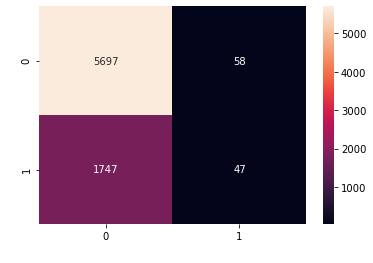

In [14]:
import seaborn as sns

y_pred = model.predict(x_test_scaled)
matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(matrix, annot=True, fmt='g')
plt.xlabel("y_predicted", color='white')
plt.ylabel('y_true', color='white')

plt.show()

In [16]:
from collections import Counter

y_pred = model.predict(x_test)

a = Counter(y_pred)
b = Counter(y_test)
a, b

(Counter({1: 6227, 0: 1322}), Counter({0: 5755, 1: 1794}))

# THE REASON THE RESPONSE IS SO LESS IS BECAUSE THE VALUE WAS VERY FEW IN THE INTIAL DATASET SO IT WAS NOT ABLE TO PREDICT THE 1 VALUE ACCURETLEY

In [19]:
# the value 1 is very few
Counter(y_train)

Counter({0: 17178, 1: 5469})